In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import math

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading file

In [2]:
with open("nba_2013.csv", 'r') as csvfile: nba = pd.read_csv(csvfile)

In [3]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
print('NBA Data - rows:' , nba.shape[0],'columns:', nba.shape[1])

NBA Data - rows: 481 columns: 31


In [5]:
nba.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

# Check % of null values in df

In [6]:
total = nba.isnull().sum().sort_values(ascending = False)
percent = (nba.isnull().sum()/nba.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,x3p.,ft.,x2p.,fg.,efg.,x2p,pos,age,bref_team_id,g,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,player
Total,67.000000,20.000000,3.000000,2.0000,2.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,13.929314,4.158004,0.623701,0.4158,0.4158,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Observations : 
    - column with highest missing values has a 13.9% values missing ie x3p column

# Missing Values

In [7]:
missingInfo = list(nba.columns[nba.isnull().any()])
missingInfo

['fg.', 'x3p.', 'x2p.', 'efg.', 'ft.']

In [8]:
for col in missingInfo:
    missingNumber = nba[nba[col].isnull() == True].shape[0]
    print('Missing Number for Col {}: {}'.format(col , missingNumber))
else :
    print(f'Data is not clean , data has missing values in columns')

Missing Number for Col fg.: 2
Missing Number for Col x3p.: 67
Missing Number for Col x2p.: 3
Missing Number for Col efg.: 2
Missing Number for Col ft.: 20
Data is not clean , data has missing values in columns


# Using Sweetviz to have a EDA of my dataset

In [71]:
import sweetviz

In [ ]:
result = sweetviz.analyze([nba, "NBA"] , target_feat = 'pts')

:ast:                              |████████████████▍    | [ 78%]   00:31  -> (00:18 left)

In [ ]:
result.show_html("Report.html")

# Get the mean of specific columns - Field Goals

In [9]:
nba.loc[:, 'fg'].mean().round(3)

192.881

# Observation :

- The Mean for Field Goals for the season was 192 goals

# Pairwise scatter plot - Comparing Assists , Field Goals , Total Rebounds

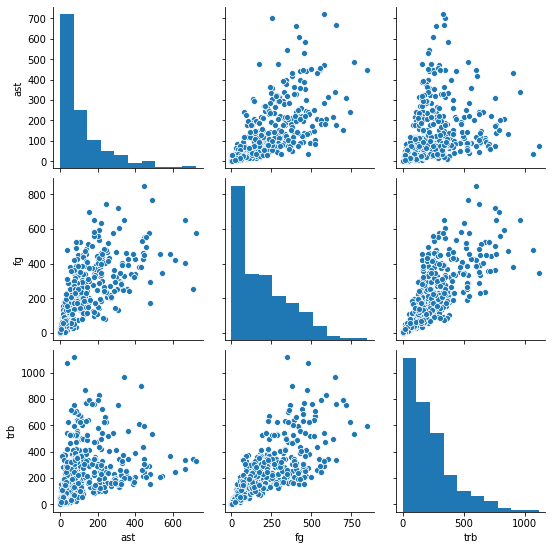

In [10]:
sns.pairplot(nba[['ast','fg','trb']])

# HeatMap to see correlations of Assist , field goals and total rebounds

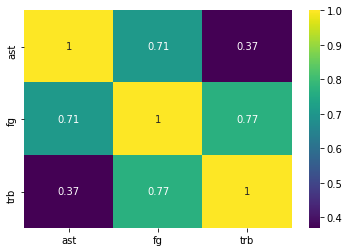

In [11]:
correlations = nba[['ast','fg','trb']].corr()
sns.heatmap(correlations , annot = True , cmap='viridis')

# Categorical Columns

In [12]:
cat_cols = list(set(nba.columns) - set(nba._get_numeric_data().columns))
cat_cols

['season', 'pos', 'bref_team_id', 'player']

# Numerical Columns

In [13]:
num_cols = list(nba._get_numeric_data().columns)
num_cols

['age',
 'g',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg.',
 'x3p',
 'x3pa',
 'x3p.',
 'x2p',
 'x2pa',
 'x2p.',
 'efg.',
 'ft',
 'fta',
 'ft.',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'season_end']

# Heatmap

In [14]:
target = 'pts'

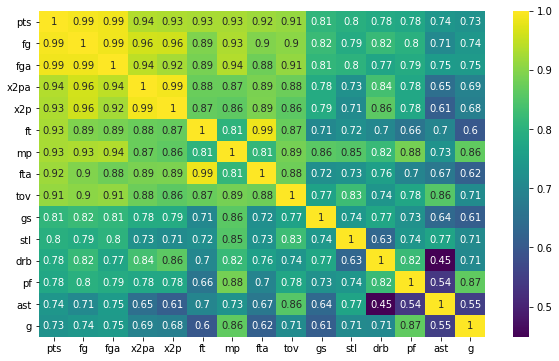

In [15]:
k = 15
cols = nba[num_cols].corr().nlargest(k , target)[target].index
cm = nba[cols].corr()
plt.figure(figsize = (10,6))
sns.heatmap(cm , annot=True , cmap='viridis')
plt.show()

In [ ]:
# Using Pairplot to Have a scope of the data

In [16]:
from matplotlib import pyplot as plt
from math import ceil

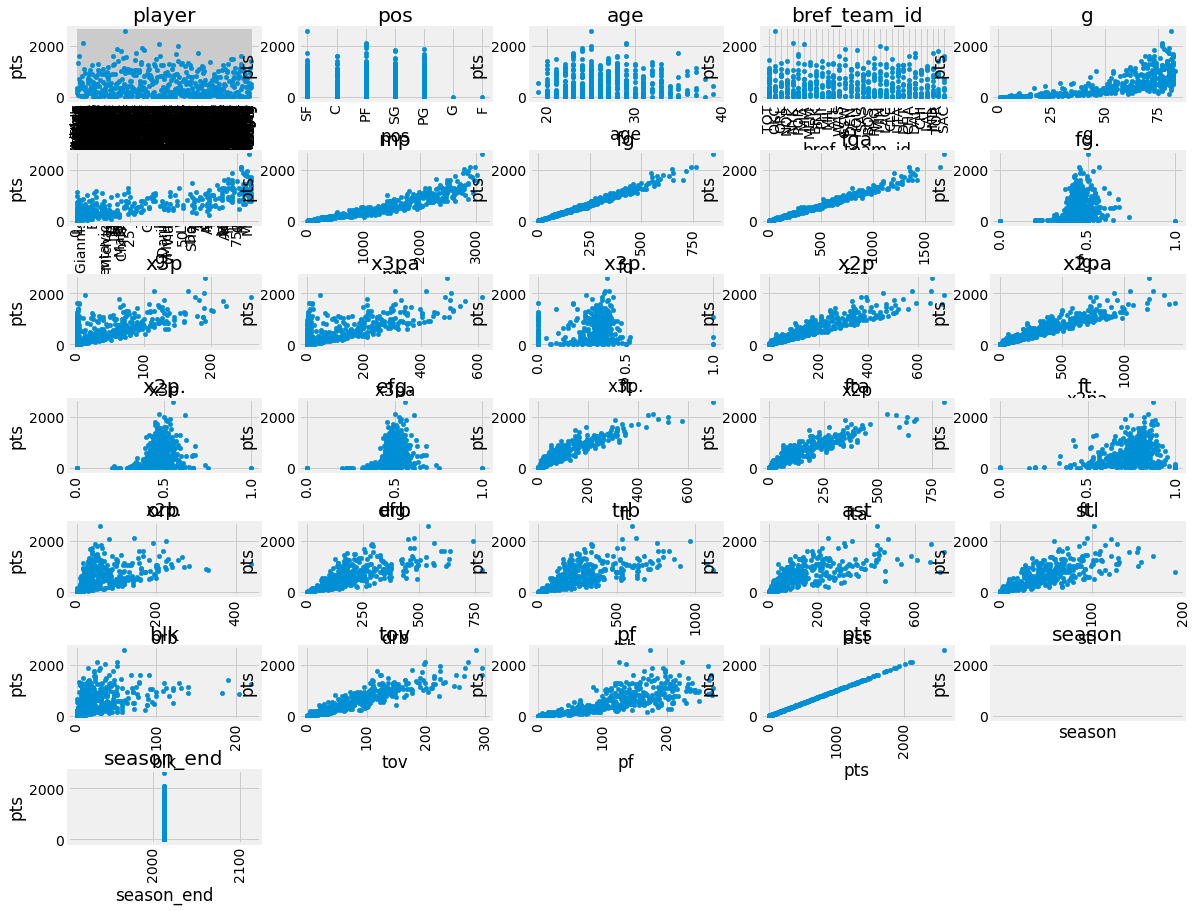

In [17]:
fig = plt.figure(figsize=(20,15))
cols = 5
plt.style.use("fivethirtyeight")
rows = ceil(float(nba.shape[1]) / cols)
for i , column in enumerate(nba.columns):
    axs = fig.add_subplot(rows, cols , i + 1)
    axs.set_title(column)
    nba.plot(kind = 'scatter' , x=column , y = 'pts' , ax=axs)
    plt.xticks(rotation = 'vertical')
plt.subplots_adjust(hspace=0.7 , wspace=0.2)    

In [18]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

# Subsetting to find top 20 players in the NBA in the 2013-2014 Season

In [19]:
sums = pd.DataFrame(nba.groupby('player')['pts'].sum())

In [20]:
top_players = sums.sort_values('pts', ascending=False)
top_20 = list(top_players[:20].index)
top_20

['Kevin Durant',
 'Carmelo Anthony',
 'LeBron James',
 'Kevin Love',
 'Blake Griffin',
 'Stephen Curry',
 'James Harden',
 'DeMar DeRozan',
 'Paul George',
 'Dirk Nowitzki',
 'Damian Lillard',
 'DeMarcus Cousins',
 'LaMarcus Aldridge',
 'Al Jefferson',
 'John Wall',
 'Monta Ellis',
 'Goran Dragic',
 'Klay Thompson',
 'Kyrie Irving',
 'Isaiah Thomas']

In [21]:
top_20_p = nba.groupby('player')['pts'].mean().sort_values(ascending=False).reset_index()[:20]
top_20_p

,player,pts
0,Kevin Durant,2593
1,Carmelo Anthony,2112
2,LeBron James,2089
3,Kevin Love,2010
4,Blake Griffin,1930
5,Stephen Curry,1873
6,James Harden,1851
7,DeMar DeRozan,1791
8,Paul George,1737
9,Dirk Nowitzki,1735


# Plotting the top 20 best players for the 2013 - 2014 season

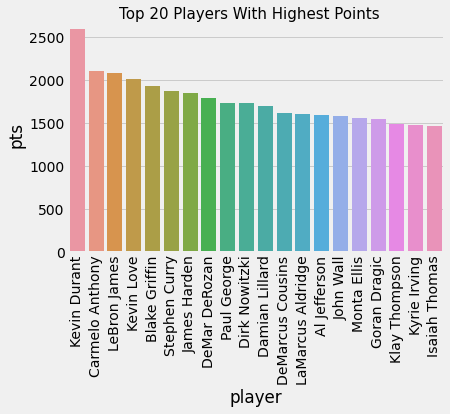

In [22]:
top_20_2 = sns.barplot(x=top_20_p['player'], y= top_20_p["pts"] , data = top_20_p)
top_20_2.set_xticklabels(labels = top_20_2.get_xticklabels() , rotation=90)
top_20_2.figure.suptitle("Top 20 Players With Highest Points" , y = 0.92 , fontsize = 15)
plt.show()

# Comparing the performance of some random most popular NBA players 

In [ ]:
data = nba.loc[nba['player'].isin(['LeBron James','Chris Paul','James Harden','Kevin Love','Dwight Howard'])]
data.head()

In [ ]:
# plt.figure(figsize = (10,5)) #Set the drawing size
# sns.barplot(x='player', y='pts',data = nba ,hue='player') 

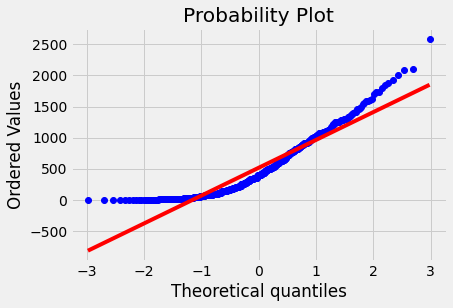

In [23]:
import pylab
import scipy.stats as stats1

Y = nba['pts']
stats1.probplot(Y, dist='norm' , plot=pylab)
pylab.show()

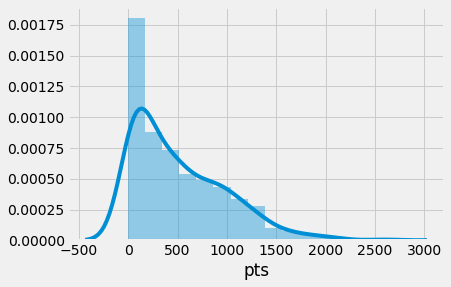

In [24]:
import seaborn as sns
sns.distplot(Y)

In [ ]:
def Build_train_test(nba):
    y = nba['pts']
    X = good_columns = nba._get_numeric_data().dropna(axis=1) # grabbing only numerical columns
#   X = pd.get_dummies(nba.drop(['season', 'season_end' , 'bref_team_id','player'] , axis = 1))
    X = good_columns.drop(columns = {'pts'} , axis = 1)
    X_train , x_test , y_train , y_test = train_test_split(X, y , test_size=.20 , random_state=42)
    print(X_train , x_test , y_train , y_test)

In [25]:
feat_obj = []
for x in nba.columns:
    if nba[x].dtype == 'object':
        feat_obj.append(x)

In [26]:
feat_obj

['player', 'pos', 'bref_team_id', 'season']

In [27]:
features_to_drop = feat_obj + ['season_end' , 'pts']
features_to_drop

['player', 'pos', 'bref_team_id', 'season', 'season_end', 'pts']

In [66]:
features = nba.drop(features_to_drop , axis=1)
labels = nba['pts']
print(features.shape)

(481, 25)


# Dealing with missing values

In [29]:
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer


In [67]:
impute = SimpleImputer(missing_values=np.nan , strategy='median')
X = impute.fit_transform(features)
y = labels.values

# KNN

 - The k-nearest neighbors is based around the simple idea of predicting unknown values by matching them with the most similar known values.

In [ ]:
# y = nba['pts']
# X = good_columns = nba._get_numeric_data().dropna(axis=1) # grabbing only numerical columns
# #   X = pd.get_dummies(nba.drop(['season', 'season_end' , 'bref_team_id','player'] , axis = 1))
# X = good_columns.drop(columns = {'pts'} , axis = 1)

In [60]:
Sample = X

# Checking the distribution of the data

In [ ]:
def plot_distribution(dataset , cols=5, width=20, height=15 , hspace=0.2, wspace=0.5):
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize=(width , height))
    fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace)
    rows = ceil(float(dataset.shape[1]) / cols)
    for i , column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols , i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column , data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(nba[column])
            plt.xticks(rotation=25)

plot_distribution(Sample, cols=2 , width=20 , height=35, hspace=0.8, wspace=0.8)            

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
X_train , x_test , y_train , y_test = train_test_split(X, y , test_size=0.20 , random_state=1)

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [41]:
sns.set_style('whitegrid')
for K in range(20):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value)
    neigh.fit(X_train , y_train)
    Y_pred = neigh.predict(x_test)
    print("RMSE is ", np.sqrt(mean_squared_error(Y_pred, y_test)) , 
    "for K-value:" , K_value)

RMSE is  109.68530429999018 for K-value: 1
RMSE is  94.71292762761487 for K-value: 2
RMSE is  97.62527417669874 for K-value: 3
RMSE is  96.14675812495263 for K-value: 4
RMSE is  83.29922710994022 for K-value: 5
RMSE is  83.0387801177042 for K-value: 6
RMSE is  88.7759207605298 for K-value: 7
RMSE is  94.66335241236945 for K-value: 8
RMSE is  97.96931606717861 for K-value: 9
RMSE is  103.49740471869406 for K-value: 10
RMSE is  106.19503735548705 for K-value: 11
RMSE is  109.1873993323716 for K-value: 12
RMSE is  107.77454037244564 for K-value: 13
RMSE is  111.39746743105337 for K-value: 14
RMSE is  114.8307391265033 for K-value: 15
RMSE is  117.52106033156859 for K-value: 16
RMSE is  120.39243270163412 for K-value: 17
RMSE is  121.85591429029819 for K-value: 18
RMSE is  123.26325728524043 for K-value: 19
RMSE is  126.47912331298244 for K-value: 20


In [45]:
K_value = 6
neigh = KNeighborsRegressor(n_neighbors = K_value)
neigh.fit(X_train , y_train)
Y_pred = neigh.predict(x_test)
print("RMSE for KNN Regressor is",np.sqrt(mean_squared_error(Y_pred, y_test)),"for K-value:" , K_value)
print("-----------------------------------------------------------------------------")
print("R Squared for KNN Regressor is" , r2_score(y_test, Y_pred))

RMSE for KNN Regressor is 83.0387801177042 for K-value: 6
-----------------------------------------------------------------------------
R Squared for KNN Regressor is 0.9748342374517244


# Observation : 
- With a k_value of 6 my RMSE is 83.585 and an r2 of 0.95
- I will be going ahead to find the best k

# Calculating the Euclinean distance

### Before we can predict using KNN, we need to find some way to figure out which data rows are "closest" to the row we're trying to predict on.


# $\sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$

In [48]:
# Select Lebron James from our dataset
selected_player = nba[nba["player"] == "LeBron James"].iloc[0]

# Choose only the numeric columns (we'll use these to compute euclidean distance)
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']


def euclidean_distance(row) :
    inner_value = 0

    for k in distance_columns:
        print(k)
        print(selected_player[k])
        inner_value += (row[k] - selected_player[k]) ** 2
        print(inner_value)
        print('-----')
        print(math.sqrt(inner_value))
    print('=====')
    return math.sqrt(inner_value)


#Find the distance from each player in the dataset to lebron.
lebron_distance = nba.apply(euclidean_distance, axis=1)


age
29
36
-----
6.0
g
77
232
-----
15.231546211727817
gs
77
6161
-----
78.49203781276162
mp
2902
4229186
-----
2056.49848042735
fg
767
4720587
-----
2172.6911883652497
fga
1353
6189531
-----
2487.8768056316617
fg.
0.5670000000000001
6189531.009801
-----
2487.8768076014135
x3p
116
6202075.009801
-----
2490.396556735694
x3pa
306
6286756.009801
-----
2507.34042559063
x3p.
0.379084967320261
6286756.0224388745
-----
2507.340428110805
x2p
651
6633677.0224388745
-----
2575.5925575367846
x2pa
1047
7481918.0224388745
-----
2735.309492989573
x2p.
0.621776504297994
7481918.03926434
-----
2735.3094960651783
efg.
0.61
7481918.05564834
-----
2735.309499060086
ft
439
7645134.05564834
-----
2764.9835543178806
fta
585
7928158.05564834
-----
2815.6985022633976
ft.
0.75
7928158.06374834
-----
2815.6985037017616
orb
81
7928239.06374834
-----
2815.7128873072875
drb
452
8023103.06374834
-----
2832.508263668147
trb
533
8123592.06374834
-----
2850.1915836919347
ast
488
8335192.06374834
-----
2887.073269549690

9803606.125026714
-----
3131.0710827170174
=====
age
29
81
-----
9.0
g
77
97
-----
9.848857801796104
gs
77
4721
-----
68.70953354520753
mp
2902
937877
-----
968.4404989466312
fg
767
1215606
-----
1102.545237167165
fga
1353
1871706
-----
1368.1030662928872
fg.
0.5670000000000001
1871706.015625
-----
1368.1030720033486
x3p
116
1871706.015625
-----
1368.1030720033486
x3pa
306
1871715.015625
-----
1368.1063612252522
x3p.
0.379084967320261
1871715.0156385456
-----
1368.1063612302025
x2p
651
2149444.0156385456
-----
1466.0982285094494
x2pa
1047
2810413.0156385456
-----
1676.428649134387
x2p.
0.621776504297994
2810413.0240771677
-----
1676.428651651232
efg.
0.61
2810413.027798168
-----
1676.4286527610318
ft
439
2921969.027798168
-----
1709.3767951502582
fta
585
3141930.027798168
-----
1772.5490198576083
ft.
0.75
3141930.051823168
-----
1772.5490266345719
orb
81
3145294.051823168
-----
1773.4976886996972
drb
452
3218194.051823168
-----
1793.9325661303906
trb
533
3325778.051823168
-----
1823.67

-----
2703.870568047269
ft.
0.75
7310916.089556261
-----
2703.8705755927485
orb
81
7311141.089556261
-----
2703.912182293697
drb
452
7452517.089556261
-----
2729.9298689813004
trb
533
7605398.089556261
-----
2757.788623073977
ast
488
7827239.089556261
-----
2797.7203379816683
stl
121
7839560.089556261
-----
2799.9214434616306
blk
26
7839921.089556261
-----
2799.985908813875
tov
270
7902421.089556261
-----
2811.124524021706
pf
126
7908662.089556261
-----
2812.2343589317484
pts
2089
10641071.089556262
-----
3262.065463714096
=====
age
29
100
-----
10.0
g
77
100
-----
10.0
gs
77
3016
-----
54.91812087098393
mp
2902
1013041
-----
1006.4993790360727
fg
767
1365877
-----
1168.70740564095
fga
1353
2240102
-----
1496.6970301300128
fg.
0.5670000000000001
2240102.023409
-----
1496.6970379502327
x3p
116
2245727.023409
-----
1498.5749975923795
x3pa
306
2281071.023409
-----
1510.3214967049234
x3p.
0.379084967320261
2281071.024409289
-----
1510.3214970360743
x2p
651
2550432.024409289
-----
1597.0072

fg.
0.5670000000000001
5540690.001225
-----
2353.8670313390685
x3p
116
5554146.001225
-----
2356.723573358785
x3pa
306
5647782.001225
-----
2376.5062594542014
x3p.
0.379084967320261
nan
-----
nan
x2p
651
nan
-----
nan
x2pa
1047
nan
-----
nan
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----
nan
ft
439
nan
-----
nan
fta
585
nan
-----
nan
ft.
0.75
nan
-----
nan
orb
81
nan
-----
nan
drb
452
nan
-----
nan
trb
533
nan
-----
nan
ast
488
nan
-----
nan
stl
121
nan
-----
nan
blk
26
nan
-----
nan
tov
270
nan
-----
nan
pf
126
nan
-----
nan
pts
2089
nan
-----
nan
=====
age
29
9
-----
3.0
g
77
45
-----
6.708203932499369
gs
77
4669
-----
68.33008122342603
mp
2902
932038
-----
965.4211516224409
fg
767
1151999
-----
1073.3121633523026
fga
1353
1555224
-----
1247.0862039169547
fg.
0.5670000000000001
1555224.023104
-----
1247.0862131801473
x3p
116
1555513.023104
-----
1247.2020778943563
x3pa
306
1556189.023104
-----
1247.4730550613108
x3p.
0.379084967320261
1556189.0235670002
-----
1247.473055246

1716.1465748856313
efg.
0.61
2945159.0878076837
-----
1716.1465810960565
ft
439
3064184.0878076837
-----
1750.4811018139224
fta
585
3282273.0878076837
-----
1811.704470328338
ft.
0.75
3282273.0900166836
-----
1811.7044709379848
orb
81
3285754.0900166836
-----
1812.6649138814055
drb
452
3393995.0900166836
-----
1842.2798620233257
trb
533
3544539.0900166836
-----
1882.6946353608923
ast
488
3630975.0900166836
-----
1905.5117659087502
stl
121
3634696.0900166836
-----
1906.4878940126223
blk
26
3634985.0900166836
-----
1906.5636863259206
tov
270
3670329.0900166836
-----
1915.8102959366001
pf
126
3671554.0900166836
-----
1916.1299773284388
pts
2089
5696483.090016684
-----
2386.7306278708293
=====
age
29
4
-----
2.0
g
77
580
-----
24.08318915758459
gs
77
5909
-----
76.87002016391045
mp
2902
5818830
-----
2412.225113873081
fg
767
6303246
-----
2510.626615010683
fga
1353
7719346
-----
2778.371105522083
fg.
0.5670000000000001
7719346.017161
-----
2778.371108610403
x3p
116
7732802.017161
-----
278

mp
2902
8173423
-----
2858.9199009416125
fg
767
8760179
-----
2959.759956482958
fga
1353
10588083
-----
3253.9334658225575
fg.
0.5670000000000001
10588083.187489
-----
3253.9334946321505
x3p
116
10601539.187489
-----
3256.0004894792323
x3pa
306
10695175.187489
-----
3270.347869491715
x3p.
0.379084967320261
nan
-----
nan
x2p
651
nan
-----
nan
x2pa
1047
nan
-----
nan
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----
nan
ft
439
nan
-----
nan
fta
585
nan
-----
nan
ft.
0.75
nan
-----
nan
orb
81
nan
-----
nan
drb
452
nan
-----
nan
trb
533
nan
-----
nan
ast
488
nan
-----
nan
stl
121
nan
-----
nan
blk
26
nan
-----
nan
tov
270
nan
-----
nan
pf
126
nan
-----
nan
pts
2089
nan
-----
nan
=====
age
29
64
-----
8.0
g
77
3428
-----
58.54912467321779
gs
77
8328
-----
91.25787637239867
mp
2902
6731977
-----
2594.605364983276
fg
767
7284026
-----
2698.893476964217
fga
1353
8907102
-----
2984.4768385765706
fg.
0.5670000000000001
8907102.069169
-----
2984.4768501646986
x3p
116
8917506.069169
-----
2

-----
3658.7140452363233
ast
488
13623357.46480954
-----
3690.9832653114995
stl
121
13637998.46480954
-----
3692.966079563897
blk
26
13638674.46480954
-----
3693.057603776245
tov
270
13710498.46480954
-----
3702.7690266622817
pf
126
13726123.46480954
-----
3704.8783333342462
pts
2089
18069179.46480954
-----
4250.785746754304
=====
age
29
16
-----
4.0
g
77
5057
-----
71.11258679024411
gs
77
10986
-----
104.81412118603103
mp
2902
8116395
-----
2848.9287460377104
fg
767
8700091
-----
2949.5916666548947
fga
1353
10514500
-----
3242.6069758760464
fg.
0.5670000000000001
10514500.004489
-----
3242.606976568237
x3p
116
10527269.004489
-----
3244.575319589453
x3pa
306
10617269.004489
-----
3258.4151062271058
x3p.
0.379084967320261
10617269.019109447
-----
3258.415108470596
x2p
651
11041070.019109447
-----
3322.8105602199844
x2pa
1047
12137279.019109447
-----
3483.8597875215137
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----
nan
ft
439
nan
-----
nan
fta
585
nan
-----
nan
ft.
0.75
nan
--

1926.6774884472522
x2p
651
3934870.144489412
-----
1983.6507113122038
x2pa
1047
4448959.144489412
-----
2109.2555901287574
x2p.
0.621776504297994
4448959.150786194
-----
2109.2555916214123
efg.
0.61
4448959.155827194
-----
2109.255592816384
ft
439
4591843.155827194
-----
2142.8586411210595
fta
585
4832924.155827194
-----
2198.3912654091387
ft.
0.75
4832924.166028194
-----
2198.391267729244
orb
81
4833180.166028194
-----
2198.449491352529
drb
452
4868524.166028194
-----
2206.473241629772
trb
533
4898108.166028194
-----
2213.1669991277645
ast
488
5069504.166028194
-----
2251.5559433485532
stl
121
5076065.166028194
-----
2253.0124646854915
blk
26
5079909.166028194
-----
2253.865383297812
tov
270
5124009.166028194
-----
2263.6274353409385
pf
126
5128365.166028194
-----
2264.5894034080866
pts
2089
7917265.166028194
-----
2813.763523473178
=====
age
29
4
-----
2.0
g
77
20
-----
4.47213595499958
gs
77
36
-----
6.0
mp
2902
85885
-----
293.0614270080592
fg
767
229526
-----
479.08871829756123
fg

29
16
-----
4.0
g
77
1312
-----
36.22154055254967
gs
77
6073
-----
77.92945527847606
mp
2902
4632874
-----
2152.41120606635
fg
767
5077763
-----
2253.3892251450925
fga
1353
6285564
-----
2507.1027103012752
fg.
0.5670000000000001
6285564.029929
-----
2507.102716270117
x3p
116
6291040.029929
-----
2508.194575771385
x3pa
306
6325636.029929
-----
2515.0817143641675
x3p.
0.379084967320261
6325636.030774935
-----
2515.08171453234
x2p
651
6677285.030774935
-----
2584.0443167203875
x2pa
1047
7510854.030774935
-----
2740.5937369071935
x2p.
0.621776504297994
7510854.066473517
-----
2740.593743420122
efg.
0.61
7510854.084429516
-----
2740.593746696054
ft
439
7676503.084429516
-----
2770.6502999168833
fta
585
7974619.084429516
-----
2823.936806026211
ft.
0.75
7974619.089470517
-----
2823.936806918759
orb
81
7978463.089470517
-----
2824.617335050983
drb
452
8113887.089470517
-----
2848.48856228536
trb
533
8298787.089470517
-----
2880.761546791146
ast
488
8507636.089470517
-----
2916.7852319755248
s

-----
3454.056201135066
orb
81
11936433.240599606
-----
3454.9143608199042
drb
452
12123922.240599606
-----
3481.942308625978
trb
533
12384022.240599606
-----
3519.093951658524
ast
488
12612506.240599606
-----
3551.4090500250186
stl
121
12625275.240599606
-----
3553.206332398895
blk
26
12625951.240599606
-----
3553.3014564767236
tov
270
12693551.240599606
-----
3562.8010385930347
pf
126
12706776.240599606
-----
3564.6565389388647
pts
2089
16892892.240599606
-----
4110.096378504963
=====
age
29
9
-----
3.0
g
77
2610
-----
51.088159097779204
gs
77
5974
-----
77.2916554357584
mp
2902
5698970
-----
2387.2515577542304
fg
767
6151899
-----
2480.302199329751
fga
1353
7424283
-----
2724.7537503414874
fg.
0.5670000000000001
7424283.022201
-----
2724.7537544154334
x3p
116
7437739.022201
-----
2727.221850565333
x3pa
306
7531375.022201
-----
2744.3350783388314
x3p.
0.379084967320261
nan
-----
nan
x2p
651
nan
-----
nan
x2pa
1047
nan
-----
nan
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----

x3p
116
1354683.0256
-----
1163.9085125558624
x3pa
306
1358908.0256
-----
1165.7221047917037
x3p.
0.379084967320261
1358908.0258086878
-----
1165.722104881214
x2p
651
1576997.0258086878
-----
1255.7854218809389
x2pa
1047
1945446.0258086878
-----
1394.7924669314384
x2p.
0.621776504297994
1945446.067259484
-----
1394.792481790565
efg.
0.61
1945446.0800284839
-----
1394.7924863679484
ft
439
2022730.0800284839
-----
1422.227154862571
fta
585
2174051.0800284836
-----
1474.4663712775832
ft.
0.75
2174051.0850694836
-----
1474.4663729870151
orb
81
2174247.0850694836
-----
1474.532836212705
drb
452
2229472.0850694836
-----
1493.1416828517927
trb
533
2291473.0850694836
-----
1513.7612378012207
ast
488
2367649.0850694836
-----
1538.7167007183239
stl
121
2371249.0850694836
-----
1539.886062366136
blk
26
2371330.0850694836
-----
1539.9123627887022
tov
270
2397574.0850694836
-----
1548.4101798520583
pf
126
2404463.0850694836
-----
1550.6331239430826
pts
2089
3663347.0850694836
-----
1913.98722176233

12306471.127286293
-----
3508.0580279246083
pf
126
12317920.127286293
-----
3509.6894630844895
pts
2089
16390244.127286293
-----
4048.4866465490895
=====
age
29
9
-----
3.0
g
77
538
-----
23.194827009486403
gs
77
4138
-----
64.32728814430156
mp
2902
4558094
-----
2134.9693206226643
fg
767
5006994
-----
2237.631336927511
fga
1353
6199458
-----
2489.8710809999784
fg.
0.5670000000000001
6199458.038025
-----
2489.871088635916
x3p
116
6205083.038025
-----
2491.000409077646
x3pa
306
6238939.038025
-----
2497.786827978921
x3p.
0.379084967320261
6238939.0398756685
-----
2497.7868283493826
x2p
651
6592964.0398756685
-----
2567.6767787000895
x2pa
1047
7417428.0398756685
-----
2723.495555325117
x2p.
0.621776504297994
7417428.087792356
-----
2723.4955641220267
efg.
0.61
7417428.113392356
-----
2723.495568821869
ft
439
7591317.113392356
-----
2755.234493358479
fta
585
7894918.113392356
-----
2809.78969202187
ft.
0.75
7894918.124001356
-----
2809.789693909734
orb
81
7898399.124001356
-----
2810.4090

651
11129101.01928266
-----
3336.0307281682312
x2pa
1047
12219037.01928266
-----
3495.57391844067
x2p.
0.621776504297994
12219037.021297786
-----
3495.5739187289096
efg.
0.61
12219037.022818787
-----
3495.5739189464707
ft
439
12411758.022818787
-----
3523.0325037982248
fta
585
12753983.022818787
-----
3571.271905472725
ft.
0.75
nan
-----
nan
orb
81
nan
-----
nan
drb
452
nan
-----
nan
trb
533
nan
-----
nan
ast
488
nan
-----
nan
stl
121
nan
-----
nan
blk
26
nan
-----
nan
tov
270
nan
-----
nan
pf
126
nan
-----
nan
pts
2089
nan
-----
nan
=====
age
29
64
-----
8.0
g
77
3908
-----
62.51399843235114
gs
77
9837
-----
99.18165152889924
mp
2902
7861041
-----
2803.754803830035
fg
767
8431066
-----
2903.6297973398746
fga
1353
10173466
-----
3189.5871206160837
fg.
0.5670000000000001
10173466.041209
-----
3189.587127076011
x3p
116
10185566.041209
-----
3191.4833606348316
x3pa
306
10270830.041209
-----
3204.8135735497935
x3p.
0.379084967320261
10270830.043657908
-----
3204.813573931861
x2p
651
106868

2089
504011.0441222766
-----
709.9373522517861
=====
age
29
9
-----
3.0
g
77
18
-----
4.242640687119285
gs
77
99
-----
9.9498743710662
mp
2902
1659043
-----
1288.0384311036685
fg
767
1964852
-----
1401.7317860418234
fga
1353
2917428
-----
1708.048008692964
fg.
0.5670000000000001
2917428.000001
-----
1708.0480086932569
x3p
116
2930884.000001
-----
1711.982476546124
x3pa
306
3023909.000001
-----
1738.9390443603822
x3p.
0.379084967320261
3023909.143706412
-----
1738.9390856802352
x2p
651
3214878.143706412
-----
1793.0081270608932
x2pa
1047
3665119.143706412
-----
1914.4500891134278
x2p.
0.621776504297994
3665119.146476073
-----
1914.4500898367849
efg.
0.61
3665119.148240073
-----
1914.4500902974914
ft
439
3779363.148240073
-----
1944.05842202339
fta
585
3980067.148240073
-----
1995.0105634407234
ft.
0.75
3980067.1484090732
-----
1995.0105634830793
orb
81
3994228.1484090732
-----
1998.5565161908914
drb
452
4006549.1484090732
-----
2001.63661747308
trb
533
4006613.1484090732
-----
2001.6526

-----
3440.7085218644
ft.
0.75
11838475.154930305
-----
3440.7085251340754
orb
81
11844251.154930305
-----
3441.547784780898
drb
452
12029151.154930305
-----
3468.306669677626
trb
533
12285187.154930305
-----
3505.023131868077
ast
488
12515587.154930305
-----
3537.7375757580303
stl
121
12529276.154930305
-----
3539.671758077337
blk
26
12529760.154930305
-----
3539.7401253383423
tov
270
12599985.154930305
-----
3549.645778796851
pf
126
12611649.154930305
-----
3551.288379578643
pts
2089
16704178.154930305
-----
4087.074522801157
=====
age
29
9
-----
3.0
g
77
909
-----
30.14962686336267
gs
77
6385
-----
79.90619500389191
mp
2902
5804849
-----
2409.3254242629823
fg
767
6299058
-----
2509.7924216954675
fga
1353
7739058
-----
2781.9162460433636
fg.
0.5670000000000001
7739058.022201
-----
2781.9162500335988
x3p
116
7748662.022201
-----
2783.6418631355937
x3pa
306
7812671.022201
-----
2795.115565088678
x3p.
0.379084967320261
7812671.0237582745
-----
2795.1155653672486
x2p
651
8178696.02375827

2607.3001361561733
fg.
0.5670000000000001
6798014.033489
-----
2607.3001425783336
x3p
116
6805239.033489
-----
2608.6853074851706
x3pa
306
6846855.033489
-----
2616.6495817149457
x3p.
0.379084967320261
6846855.039138537
-----
2616.649582794482
x2p
651
7217736.039138537
-----
2686.584455984687
x2pa
1047
8137417.039138537
-----
2852.6158239655297
x2p.
0.621776504297994
8137417.060019879
-----
2852.6158276255637
efg.
0.61
8137417.080755878
-----
2852.6158312601224
ft
439
8308813.080755878
-----
2882.5011848663444
fta
585
8612414.080755878
-----
2934.691479654357
ft.
0.75
8612414.080980878
-----
2934.6914796926912
orb
81
8616383.080980878
-----
2935.36762279972
drb
452
8763072.080980878
-----
2960.248651883973
trb
533
8961988.080980878
-----
2993.6579766200543
ast
488
9138388.080980878
-----
3022.9766921001687
stl
121
9148792.080980878
-----
3024.6970230059205
blk
26
9149233.080980878
-----
3024.7699219909073
tov
270
9204929.080980878
-----
3033.9626037545154
pf
126
9206954.080980878
-----

8769294.018893074
-----
2961.2993801527523
x2pa
1047
9729694.018893074
-----
3119.245745191147
x2p.
0.621776504297994
9729694.049174402
-----
3119.2457500450973
efg.
0.61
9729694.054650402
-----
3119.2457509228734
ft
439
9913735.054650402
-----
3148.6084314583168
fta
585
10243211.054650402
-----
3200.501687962436
ft.
0.75
10243211.079931403
-----
3200.501691911973
orb
81
10248540.079931403
-----
3201.3341093880535
drb
452
10422429.079931403
-----
3228.378707638155
trb
533
10662529.079931403
-----
3265.3528262549826
ast
488
10882490.079931403
-----
3298.8619370824545
stl
121
10893515.079931403
-----
3300.532544898081
blk
26
10894091.079931403
-----
3300.6198023903635
tov
270
10961172.079931403
-----
3310.766086562354
pf
126
10969821.079931403
-----
3312.072022153414
pts
2089
14748957.079931403
-----
3840.4370949061777
=====
age
29
1
-----
1.0
g
77
26
-----
5.0990195135927845
gs
77
51
-----
7.14142842854285
mp
2902
14692
-----
121.21056059601408
fg
767
51173
-----
226.2144999773445
fga
1

4903659.089122046
-----
2214.420711861693
fta
585
5167855.089122046
-----
2273.2916858867993
ft.
0.75
5167855.089747046
-----
2273.2916860242653
orb
81
5172616.089747046
-----
2274.3386049018836
drb
452
5289580.089747046
-----
2299.9087133508247
trb
533
5458501.089747046
-----
2336.3435299088715
ast
488
5596142.089747046
-----
2365.616640486587
stl
121
5598743.089747046
-----
2366.166327574426
blk
26
5599272.089747046
-----
2366.2781091298307
tov
270
5648113.089747046
-----
2376.5759171015443
pf
126
5649074.089747046
-----
2376.7780901352667
pts
2089
8417970.089747045
-----
2901.3738279902927
=====
age
29
64
-----
8.0
g
77
65
-----
8.06225774829855
gs
77
5394
-----
73.44385610791416
mp
2902
1962595
-----
1400.9264791558478
fg
767
2253116
-----
1501.0383073059795
fga
1353
2907597
-----
1705.1677336848713
fg.
0.5670000000000001
2907597.021904
-----
1705.1677401076997
x3p
116
2908326.021904
-----
1705.3814886716696
x3pa
306
2913087.021904
-----
1706.776793228687
x3p.
0.379084967320261
291

1608.5070750602642
x2p
651
2787104.0105189267
-----
1669.4621920004438
x2pa
1047
3246788.0105189267
-----
1801.8845719187805
x2p.
0.621776504297994
3246788.015270406
-----
1801.8845732372554
efg.
0.61
3246788.020031406
-----
1801.8845745583722
ft
439
3324629.020031406
-----
1823.356525759953
fta
585
3482238.020031406
-----
1866.0755665383451
ft.
0.75
3482238.030232406
-----
1866.0755692716216
orb
81
3484839.030232406
-----
1866.7723562963981
drb
452
3563239.030232406
-----
1887.654372556694
trb
533
3672800.030232406
-----
1916.455068670384
ast
488
3710825.030232406
-----
1926.3501836977632
stl
121
3713426.030232406
-----
1927.0251763359
blk
26
3713507.030232406
-----
1927.0461930717713
tov
270
3730668.030232406
-----
1931.4937303114411
pf
126
3730672.030232406
-----
1931.4947657791895
pts
2089
5295673.030232406
-----
2301.232936978003
=====
age
29
64
-----
8.0
g
77
1088
-----
32.984845004941285
gs
77
7017
-----
83.76753547765387
mp
2902
6098041
-----
2469.421187242063
fg
767
6632402
--

168080.0259690141
-----
409.97564070199843
ft.
0.75
168080.0271940141
-----
409.9756421959896
orb
81
180401.0271940141
-----
424.73642084711094
drb
452
193170.0271940141
-----
439.5111229468648
trb
533
243346.0271940141
-----
493.3011526380352
ast
488
275387.0271940141
-----
524.7733102912287
stl
121
276228.0271940141
-----
525.5739978290537
blk
26
276853.0271940141
-----
526.1682498916236
tov
270
278969.0271940141
-----
528.1751860831916
pf
126
298290.0271940141
-----
546.1593423113937
pts
2089
323571.0271940141
-----
568.833039822771
=====
age
29
16
-----
4.0
g
77
3860
-----
62.12889826803627
gs
77
9485
-----
97.3909646733207
mp
2902
7074449
-----
2659.7836378171814
fg
767
7625013
-----
2761.342608225209
fga
1353
9312414
-----
3051.624813111861
fg.
0.5670000000000001
9312414.010816
-----
3051.624814884032
x3p
116
9325183.010816
-----
3053.716262329557
x3pa
306
9411619.010816
-----
3067.836209906911
x3p.
0.379084967320261
9411619.02747893
-----
3067.836212622657
x2p
651
9807260.027478

nan
-----
nan
pf
126
nan
-----
nan
pts
2089
nan
-----
nan
=====
age
29
16
-----
4.0
g
77
25
-----
5.0
gs
77
26
-----
5.0990195135927845
mp
2902
186650
-----
432.03009154455896
fg
767
319146
-----
564.9300841697138
fga
1353
540046
-----
734.8782212040305
fg.
0.5670000000000001
540046.012321
-----
734.878229587052
x3p
116
540190.012321
-----
734.9761984724403
x3pa
306
540194.012321
-----
734.9789196439582
x3p.
0.379084967320261
540194.0136532097
-----
734.9789205502493
x2p
651
681570.0136532097
-----
825.5725368816538
x2pa
1047
904354.0136532097
-----
950.9752960267735
x2p.
0.621776504297994
904354.034249947
-----
950.975306856044
efg.
0.61
904354.0408109471
-----
950.9753103056604
ft
439
1006754.0408109471
-----
1003.3713374473815
fta
585
1194243.040810947
-----
1092.814275534021
ft.
0.75
1194243.041899947
-----
1092.8142760322758
orb
81
1196743.041899947
-----
1093.9575137545091
drb
452
1202672.041899947
-----
1096.6640515216804
trb
533
1218801.041899947
-----
1103.993225477379
ast
488

-----
1459.8637502249562
ft
439
2214723.1692208736
-----
1488.1946005885366
fta
585
2301748.1692208736
-----
1517.151333658206
ft.
0.75
2301748.2235098737
-----
1517.1513515499612
orb
81
2317373.2235098737
-----
1522.292095331863
drb
452
2318049.2235098737
-----
1522.5141127457157
trb
533
2327850.2235098737
-----
1525.729407041063
ast
488
2481514.2235098737
-----
1575.2822678840366
stl
121
2486990.2235098737
-----
1577.0194112660356
blk
26
2487615.2235098737
-----
1577.2175574440812
tov
270
2507779.2235098737
-----
1583.5969258336775
pf
126
2510380.2235098737
-----
1584.4179447071008
pts
2089
4136005.2235098737
-----
2033.7170952494532
=====
age
29
4
-----
2.0
g
77
580
-----
24.08318915758459
gs
77
2180
-----
46.69047011971501
mp
2902
1803144
-----
1342.8119749242633
fg
767
2022168
-----
1422.0295355582457
fga
1353
2598249
-----
1611.9084961622357
fg.
0.5670000000000001
2598249.004096
-----
1611.9084974327793
x3p
116
2611474.004096
-----
1616.0055705646562
x3pa
306
2702075.004096
-----

13790101.286400434
-----
3713.502563133683
pts
2089
18149845.286400434
-----
4260.2635231169015
=====
age
29
4
-----
2.0
g
77
2308
-----
48.041648597857254
gs
77
4612
-----
67.91170738539859
mp
2902
3783748
-----
1945.1858523030646
fg
767
4063589
-----
2015.83456662495
fga
1353
4934078
-----
2221.2784607068065
fg.
0.5670000000000001
4934078.0
-----
2221.2784607068065
x3p
116
4946622.0
-----
2224.100267523926
x3pa
306
5033647.0
-----
2243.5790603408655
x3p.
0.379084967320261
5033647.00023866
-----
2243.5790603940527
x2p
651
5207536.00023866
-----
2282.002629323345
x2pa
1047
5614580.00023866
-----
2369.510498022463
x2p.
0.621776504297994
5614580.002703719
-----
2369.510498542625
efg.
0.61
5614580.004224719
-----
2369.510498863577
ft
439
5759741.004224719
-----
2399.94604194026
fta
585
6009741.004224719
-----
2451.477310566981
ft.
0.75
6009741.008848718
-----
2451.4773115100857
orb
81
6009966.008848718
-----
2451.5232017765443
drb
452
6085042.008848718
-----
2466.7877916125494
trb
533
616

-----
1103.1718154340288
ft.
0.75
1216988.0748170107
-----
1103.1718247023039
orb
81
1218432.0748170107
-----
1103.8261071459629
drb
452
1251556.0748170107
-----
1118.7296701245616
trb
533
1299956.0748170107
-----
1140.156162469427
ast
488
1324605.0748170107
-----
1150.9148860002683
stl
121
1325901.0748170107
-----
1151.477778690067
blk
26
1326190.0748170107
-----
1151.6032627676125
tov
270
1336594.0748170107
-----
1156.111618667078
pf
126
1336850.0748170107
-----
1156.2223293195002
pts
2089
2422614.0748170107
-----
1556.4748873068947
=====
age
29
36
-----
6.0
g
77
4660
-----
68.26419266350405
gs
77
10589
-----
102.90286682109493
mp
2902
7822614
-----
2796.893634016138
fg
767
8401735
-----
2898.5746497201
fga
1353
10162664
-----
3187.8933482787656
fg.
0.5670000000000001
10162664.112896
-----
3187.893365985757
x3p
116
10175889.112896
-----
3189.9669454237296
x3pa
306
10261153.112896
-----
3203.303468748473
x3p.
0.379084967320261
10261153.207548456
-----
3203.3034835226676
x2p
651
106784

0.5670000000000001
9822332.034596
-----
3134.059992182026
x3p
116
9834876.034596
-----
3136.060591665282
x3pa
306
9917820.034596
-----
3149.2570607360713
x3p.
0.379084967320261
9917820.05920192
-----
3149.2570646426943
x2p
651
10326141.05920192
-----
3213.431352806828
x2pa
1047
11372670.05920192
-----
3372.338959713558
x2p.
0.621776504297994
11372670.074031437
-----
3372.3389619122568
efg.
0.61
11372670.106792437
-----
3372.338966769568
ft
439
11561895.106792437
-----
3400.2786807543343
fta
585
11899456.106792437
-----
3449.5588278492132
ft.
0.75
11899456.169292437
-----
3449.5588369083425
orb
81
11905540.169292437
-----
3450.4405761137864
drb
452
12093029.169292437
-----
3477.5032953675886
trb
533
12354150.169292437
-----
3514.847104682142
ast
488
12581679.169292437
-----
3547.0662764166723
stl
121
12596079.169292437
-----
3549.095542429428
blk
26
12596704.169292437
-----
3549.183591939481
tov
270
12663785.169292437
-----
3558.6212455517707
pf
126
12677010.169292437
-----
3560.4789241

1249.8263909410625
efg.
0.61
1562066.0096087616
-----
1249.8263917875802
ft
439
1665107.0096087616
-----
1290.3902547713083
fta
585
1817207.0096087616
-----
1348.038207770374
ft.
0.75
1817207.0306337615
-----
1348.0382155687432
orb
81
1823768.0306337615
-----
1350.4695593140045
drb
452
1831164.0306337615
-----
1353.2050955541667
trb
533
1831189.0306337615
-----
1353.214332851142
ast
488
1991990.0306337615
-----
1411.378769371908
stl
121
1996614.0306337615
-----
1413.015934317006
blk
26
2001943.0306337615
-----
1414.9003606734157
tov
270
2041544.0306337615
-----
1428.8261023069817
pf
126
2041713.0306337615
-----
1428.8852405402477
pts
2089
3405937.0306337615
-----
1845.5180927408328
=====
age
29
16
-----
4.0
g
77
41
-----
6.4031242374328485
gs
77
66
-----
8.12403840463596
mp
2902
1090
-----
33.015148038438355
fg
767
176651
-----
420.29870330516127
fga
1353
878895
-----
937.4939999807999
fg.
0.5670000000000001
878895.011881
-----
937.4940063173738
x3p
116
892351.011881
-----
944.64332521

mp
2902
4188387
-----
2046.5549100867047
fg
767
4657612
-----
2158.1501337951445
fga
1353
6080861
-----
2465.940185811489
fg.
0.5670000000000001
6080861.002916
-----
2465.940186402744
x3p
116
6094086.002916
-----
2468.6202630044177
x3pa
306
6184687.002916
-----
2486.903094798026
x3p.
0.379084967320261
6184687.034987425
-----
2486.903101246091
x2p
651
6509587.034987425
-----
2551.3892362764695
x2pa
1047
7305251.034987425
-----
2702.822790156141
x2p.
0.621776504297994
7305251.044827244
-----
2702.8227919764263
efg.
0.61
7305251.0536632445
-----
2702.822793611014
ft
439
7448135.0536632445
-----
2729.127159672712
fta
585
7665291.0536632445
-----
2768.626203311535
ft.
0.75
7665291.109832245
-----
2768.6262134553745
orb
81
7665967.109832245
-----
2768.748292971437
drb
452
7796288.109832245
-----
2792.183394734709
trb
533
7946057.109832245
-----
2818.875149741869
ast
488
8119113.109832245
-----
2849.4057467886605
stl
121
8125674.109832245
-----
2850.5568069821456
blk
26
8125723.109832245
----

ast
488
10263589.13345333
-----
3203.683681865819
stl
121
10272614.13345333
-----
3205.0919071772855
blk
26
10273239.13345333
-----
3205.1894067985013
tov
270
10326600.13345333
-----
3213.502782549492
pf
126
10333000.13345333
-----
3214.4984264194827
pts
2089
14162849.13345333
-----
3763.3560997404074
=====
age
29
9
-----
3.0
g
77
234
-----
15.297058540778355
gs
77
490
-----
22.135943621178654
mp
2902
462890
-----
680.3601987182966
fg
767
639290
-----
799.5561268603975
fga
1353
938499
-----
968.7615805759434
fg.
0.5670000000000001
938499.018496
-----
968.7615901221518
x3p
116
940435.018496
-----
969.7602891931593
x3pa
306
951251.018496
-----
975.3209822904457
x3p.
0.379084967320261
951251.0190089919
-----
975.3209825534319
x2p
651
1092627.0190089918
-----
1045.288007684481
x2pa
1047
1288876.0190089918
-----
1135.2867562906704
x2p.
0.621776504297994
1288876.0467240796
-----
1135.2867684968762
efg.
0.61
1288876.0649490796
-----
1135.2867765234826
ft
439
1302101.0649490796
-----
1141.0964

fga
1353
10842182
-----
3292.74687760842
fg.
0.5670000000000001
10842182.187489
-----
3292.7469060784188
x3p
116
10855638.187489
-----
3294.7895513202357
x3pa
306
10949274.187489
-----
3308.9687498507747
x3p.
0.379084967320261
nan
-----
nan
x2p
651
nan
-----
nan
x2pa
1047
nan
-----
nan
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----
nan
ft
439
nan
-----
nan
fta
585
nan
-----
nan
ft.
0.75
nan
-----
nan
orb
81
nan
-----
nan
drb
452
nan
-----
nan
trb
533
nan
-----
nan
ast
488
nan
-----
nan
stl
121
nan
-----
nan
blk
26
nan
-----
nan
tov
270
nan
-----
nan
pf
126
nan
-----
nan
pts
2089
nan
-----
nan
=====
age
29
36
-----
6.0
g
77
61
-----
7.810249675906654
gs
77
86
-----
9.273618495495704
mp
2902
1311
-----
36.207733980463345
fg
767
47107
-----
217.04147069166297
fga
1353
49508
-----
222.50393254951697
fg.
0.5670000000000001
49508.020449
-----
222.50397850150907
x3p
116
59912.020449
-----
244.7693208900985
x3pa
306
121416.020449
-----
348.4480168533034
x3p.
0.379084967320261
121416.

3108.840974099968
tov
270
9726396.202242838
-----
3118.7170763380955
pf
126
9733621.202242838
-----
3119.8751901707283
pts
2089
13458521.202242838
-----
3668.585722351713
=====
age
29
36
-----
6.0
g
77
52
-----
7.211102550927978
gs
77
4408
-----
66.39277069079132
mp
2902
1998152
-----
1413.56004470981
fg
767
2309516
-----
1519.7091827056913
fga
1353
3035420
-----
1742.2456772797573
fg.
0.5670000000000001
3035420.0225
-----
1742.2456837369407
x3p
116
3038336.0225
-----
1743.0823338270627
x3pa
306
3053220.0225
-----
1747.3465662254869
x3p.
0.379084967320261
3053220.024274806
-----
1747.3465667333444
x2p
651
3307236.024274806
-----
1818.5807719963407
x2pa
1047
3840136.024274806
-----
1959.626501217721
x2p.
0.621776504297994
3840136.0492559066
-----
1959.6265075916651
efg.
0.61
3840136.0664169067
-----
1959.6265119703057
ft
439
3980761.0664169067
-----
1995.184469270174
fta
585
4241882.066416906
-----
2059.5829836199623
ft.
0.75
4241882.079641907
-----
2059.5829868305636
orb
81
4245482.079

975.2005018635609
x2p.
0.621776504297994
951016.0491520547
-----
975.200517407602
efg.
0.61
951016.0645280547
-----
975.2005252911089
ft
439
969512.0645280547
-----
984.6380373152638
fta
585
1029537.0645280547
-----
1014.6610589394148
ft.
0.75
1029537.0844090547
-----
1014.6610687362823
orb
81
1031746.0844090547
-----
1015.749026289986
drb
452
1111835.0844090548
-----
1054.4359081561358
trb
533
1220735.0844090548
-----
1104.8688086868299
ast
488
1355424.0844090548
-----
1164.22681828287
stl
121
1358449.0844090548
-----
1165.5252397134327
blk
26
1358849.0844090548
-----
1165.6968235390602
tov
270
1385745.0844090548
-----
1177.1767430632729
pf
126
1385754.0844090548
-----
1177.1805657625575
pts
2089
2011435.0844090548
-----
1418.250712818102
=====
age
29
16
-----
4.0
g
77
2720
-----
52.15361924162119
gs
77
8345
-----
91.35097153287424
mp
2902
6988509
-----
2643.5788242456474
fg
767
7539073
-----
2745.737241616539
fga
1353
9192869
-----
3031.974439206241
fg.
0.5670000000000001
9192869.037

77
7499
-----
86.59676668328905
mp
2902
5892975
-----
2427.545056224498
fg
767
6373224
-----
2524.5245096849426
fga
1353
7753849
-----
2784.5733964110195
fg.
0.5670000000000001
7753849.022801
-----
2784.573400505183
x3p
116
7761245.022801
-----
2785.9011150435686
x3pa
306
7812321.022801
-----
2795.0529552766975
x3p.
0.379084967320261
7812321.022817686
-----
2795.0529552796825
x2p
651
8180770.022817686
-----
2860.204542129406
x2pa
1047
9081371.022817686
-----
3013.5313210281533
x2p.
0.621776504297994
9081371.05267646
-----
3013.53132598227
efg.
0.61
9081371.06477646
-----
3013.5313279898814
ft
439
9254427.06477646
-----
3042.1089830537726
fta
585
9558028.06477646
-----
3091.6060655873443
ft.
0.75
9558028.07025246
-----
3091.6060664729685
orb
81
9563504.07025246
-----
3092.491563489294
drb
452
9732425.07025246
-----
3119.6834887937684
trb
533
9967650.07025246
-----
3157.1585437308117
ast
488
10180171.07025246
-----
3190.638034978656
stl
121
10191620.07025246
-----
3192.4316860744975
blk


-----
2549.26441424263
trb
533
6683649.05372382
-----
2585.275430921011
ast
488
6873745.05372382
-----
2621.782800638493
stl
121
6879370.05372382
-----
2622.8553245888
blk
26
6879491.05372382
-----
2622.8783909521653
tov
270
6930567.05372382
-----
2632.5970169632533
pf
126
6931096.05372382
-----
2632.6974861772137
pts
2089
9446492.05372382
-----
3073.51460932331
=====
age
29
64
-----
8.0
g
77
425
-----
20.615528128088304
gs
77
6050
-----
77.78174593052023
mp
2902
3692450
-----
1921.574874939824
fg
767
4129371
-----
2032.0853820644447
fga
1353
5388255
-----
2321.261510472269
fg.
0.5670000000000001
5388255.011664
-----
2321.261512984696
x3p
116
5399280.011664
-----
2323.6350857361404
x3pa
306
5480505.011664
-----
2341.047844804544
x3p.
0.379084967320261
5480505.032609197
-----
2341.0478492780103
x2p
651
5789641.032609197
-----
2406.167291068765
x2pa
1047
6490210.032609197
-----
2547.5890627432827
x2p.
0.621776504297994
6490210.0613040505
-----
2547.589068375049
efg.
0.61
6490210.07743305

x3p.
0.379084967320261
nan
-----
nan
x2p
651
nan
-----
nan
x2pa
1047
nan
-----
nan
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----
nan
ft
439
nan
-----
nan
fta
585
nan
-----
nan
ft.
0.75
nan
-----
nan
orb
81
nan
-----
nan
drb
452
nan
-----
nan
trb
533
nan
-----
nan
ast
488
nan
-----
nan
stl
121
nan
-----
nan
blk
26
nan
-----
nan
tov
270
nan
-----
nan
pf
126
nan
-----
nan
pts
2089
nan
-----
nan
=====
age
29
36
-----
6.0
g
77
61
-----
7.810249675906654
gs
77
86
-----
9.273618495495704
mp
2902
45030
-----
212.20273325289662
fg
767
114199
-----
337.9334253961866
fga
1353
228443
-----
477.9571110465875
fg.
0.5670000000000001
228443.0049
-----
477.95711617257047
x3p
116
241899.0049
-----
491.83229347004044
x3pa
306
334924.0049
-----
578.7261916485204
x3p.
0.379084967320261
334924.14860541245
-----
578.7263158051588
x2p
651
356533.14860541245
-----
597.103968003406
x2pa
1047
357622.14860541245
-----
598.0151742267185
x2p.
0.621776504297994
357622.1641642537
-----
598.0151872354528
ef

-----
6.0
g
77
4261
-----
65.27633568147036
gs
77
9886
-----
99.42836617384397
mp
2902
7381111
-----
2716.820016121789
fg
767
7945112
-----
2818.707505222917
fga
1353
9674337
-----
3110.359625509565
fg.
0.5670000000000001
9674337.021316
-----
3110.359628936178
x3p
116
9687793.021316
-----
3112.521971218195
x3pa
306
9781429.021316
-----
3127.527621191538
x3p.
0.379084967320261
nan
-----
nan
x2p
651
nan
-----
nan
x2pa
1047
nan
-----
nan
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----
nan
ft
439
nan
-----
nan
fta
585
nan
-----
nan
ft.
0.75
nan
-----
nan
orb
81
nan
-----
nan
drb
452
nan
-----
nan
trb
533
nan
-----
nan
ast
488
nan
-----
nan
stl
121
nan
-----
nan
blk
26
nan
-----
nan
tov
270
nan
-----
nan
pf
126
nan
-----
nan
pts
2089
nan
-----
nan
=====
age
29
4
-----
2.0
g
77
29
-----
5.385164807134504
gs
77
2238
-----
47.30750469005948
mp
2902
1283662
-----
1132.9880846681488
fg
767
1515986
-----
1231.253832481345
fga
1353
2168850
-----
1472.7015991028188
fg.
0.5670000000000001
2

fta
585
5455190.071531846
-----
2335.634832659388
ft.
0.75
5455190.077156846
-----
2335.634833863557
orb
81
5455974.077156846
-----
2335.8026622890998
drb
452
5518474.077156846
-----
2349.1432645023688
trb
533
5595758.077156846
-----
2365.535473662749
ast
488
5810127.077156846
-----
2410.420518738763
stl
121
5820736.077156846
-----
2412.6201684386306
blk
26
5820745.077156846
-----
2412.622033629977
tov
270
5868706.077156846
-----
2422.5412436441297
pf
126
5869282.077156846
-----
2422.6601241521366
pts
2089
8604998.077156845
-----
2933.427701027732
=====
age
29
1
-----
1.0
g
77
10
-----
3.1622776601683795
gs
77
19
-----
4.358898943540674
mp
2902
6743
-----
82.11577193207161
fg
767
156512
-----
395.6159754104983
fga
1353
462321
-----
679.9419092834328
fg.
0.5670000000000001
462321.008464
-----
679.941915507494
x3p
116
475777.008464
-----
689.7659084530055
x3pa
306
568193.008464
-----
753.7857842013207
x3p.
0.379084967320261
568193.1521694124
-----
753.7858795237626
x2p
651
641634.1521694

-----
3328.2390299965555
drb
452
11264664.040792411
-----
3356.2872405073454
trb
533
11527833.040792411
-----
3395.2662694982278
ast
488
11717929.040792411
-----
3423.1460735400133
stl
121
11729378.040792411
-----
3424.8179573215875
blk
26
11730003.040792411
-----
3424.90920183184
tov
270
11789539.040792411
-----
3433.5898183668373
pf
126
11801420.040792411
-----
3435.3194961738873
pts
2089
15615629.040792411
-----
3951.6615544340852
=====
age
29
4
-----
2.0
g
77
85
-----
9.219544457292887
gs
77
166
-----
12.884098726725126
mp
2902
819191
-----
905.09170806057
fg
767
915912
-----
957.0329147944703
fga
1353
1108633
-----
1052.9164259332267
fg.
0.5670000000000001
1108633.004624
-----
1052.9164281290325
x3p
116
1116914.004624
-----
1056.841522946558
x3pa
306
1174035.004624
-----
1083.528958830358
x3p.
0.379084967320261
1174035.00465941
-----
1083.5289588466983
x2p
651
1222435.00465941
-----
1105.6378270751277
x2pa
1047
1262435.00465941
-----
1123.5813297930017
x2p.
0.621776504297994
12624

=====
age
29
16
-----
4.0
g
77
5641
-----
75.1065909225016
gs
77
11570
-----
107.56393447619885
mp
2902
8415771
-----
2900.9948293645753
fg
767
9004060
-----
3000.6765903709115
fga
1353
10831964
-----
3291.1949197821755
fg.
0.5670000000000001
10831964.321489
-----
3291.194968622947
x3p
116
10845420.321489
-----
3293.2385764607156
x3pa
306
10939056.321489
-----
3307.424424153786
x3p.
0.379084967320261
nan
-----
nan
x2p
651
nan
-----
nan
x2pa
1047
nan
-----
nan
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----
nan
ft
439
nan
-----
nan
fta
585
nan
-----
nan
ft.
0.75
nan
-----
nan
orb
81
nan
-----
nan
drb
452
nan
-----
nan
trb
533
nan
-----
nan
ast
488
nan
-----
nan
stl
121
nan
-----
nan
blk
26
nan
-----
nan
tov
270
nan
-----
nan
pf
126
nan
-----
nan
pts
2089
nan
-----
nan
=====
age
29
36
-----
6.0
g
77
85
-----
9.219544457292887
gs
77
3110
-----
55.767373974394744
mp
2902
2650239
-----
1627.9554662213584
fg
767
2972863
-----
1724.1992344273906
fga
1353
4077464
-----
2019.2731365518

121
9748502.104384221
-----
3122.259134726684
blk
26
9748551.104384221
-----
3122.2669815991426
tov
270
9801912.104384221
-----
3130.8005532745487
pf
126
9805756.104384221
-----
3131.4143935902543
pts
2089
13351445.104384221
-----
3653.9629314463796
=====
age
29
1
-----
1.0
g
77
3970
-----
63.00793600809346
gs
77
9899
-----
99.49371839468057
mp
2902
7889148
-----
2808.7627169271527
fg
767
8466748
-----
2909.7676883215263
fga
1353
10259669
-----
3203.0718068753936
fg.
0.5670000000000001
10259669.004489
-----
3203.0718075761274
x3p
116
10273125.004489
-----
3205.1716029705804
x3pa
306
10366761.004489
-----
3219.745487532982
x3p.
0.379084967320261
nan
-----
nan
x2p
651
nan
-----
nan
x2pa
1047
nan
-----
nan
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----
nan
ft
439
nan
-----
nan
fta
585
nan
-----
nan
ft.
0.75
nan
-----
nan
orb
81
nan
-----
nan
drb
452
nan
-----
nan
trb
533
nan
-----
nan
ast
488
nan
-----
nan
stl
121
nan
-----
nan
blk
26
nan
-----
nan
tov
270
nan
-----
nan
pf
126
n

ast
488
7275398.221631565
-----
2697.2946115750065
stl
121
7285002.221631565
-----
2699.074326807538
blk
26
7285038.221631565
-----
2699.0809957523625
tov
270
7330407.221631565
-----
2707.472478462443
pf
126
7330432.221631565
-----
2707.4770953106076
pts
2089
10392932.221631564
-----
3223.807100561627
=====
age
29
4
-----
2.0
g
77
2213
-----
47.042533945356304
gs
77
4422
-----
66.4981202741852
mp
2902
3629638
-----
1905.1608855947047
fg
767
4021514
-----
2005.3712873181364
fga
1353
5027523
-----
2242.213861343293
fg.
0.5670000000000001
5027523.026896
-----
2242.2138673409368
x3p
116
5035623.026896
-----
2244.019390935827
x3pa
306
5082279.026896
-----
2254.391054563516
x3p.
0.379084967320261
5082279.035031333
-----
2254.391056367846
x2p
651
5369575.035031333
-----
2317.2343504771657
x2pa
1047
5988944.035031333
-----
2447.231912800937
x2p.
0.621776504297994
5988944.067240387
-----
2447.2319193816484
efg.
0.61
5988944.0961403875
-----
2447.231925286279
ft
439
6146553.0961403875
-----
2479

-----
1844.312084548758
x2pa
1047
3645523.065212585
-----
1909.3252905706206
x2p.
0.621776504297994
3645523.0871157325
-----
1909.3252963064551
efg.
0.61
3645523.1064367327
-----
1909.3253013660958
ft
439
3761123.1064367327
-----
1939.3615203042295
fta
585
3962724.1064367327
-----
1990.659214038589
ft.
0.75
3962724.1069207327
-----
1990.6592141601568
orb
81
3962749.1069207327
-----
1990.665493477177
drb
452
3984358.1069207327
-----
1996.0856962867933
trb
533
4004522.1069207327
-----
2001.130207387998
ast
488
4170171.1069207327
-----
2042.0996809462395
stl
121
4179196.1069207327
-----
2044.3082220939025
blk
26
4179296.1069207327
-----
2044.3326800989933
tov
270
4205540.106920732
-----
2050.7413554421564
pf
126
4206984.106920732
-----
2051.0933930274196
pts
2089
6347353.106920732
-----
2519.3953851908063
=====
age
29
16
-----
4.0
g
77
25
-----
5.0
gs
77
5066
-----
71.17583859709698
mp
2902
2021466
-----
1421.782683816342
fg
767
2238622
-----
1496.2025263980809
fga
1353
2764247
-----
1662

-----
2383.7869050418494
x3p
116
5695896.008649
-----
2386.6076360912366
x3pa
306
5788921.008649
-----
2406.0176659054273
x3p.
0.379084967320261
5788921.152354413
-----
2406.0176957691756
x2p
651
6060362.152354413
-----
2461.780281088142
x2pa
1047
6659438.152354413
-----
2580.5887220466598
x2p.
0.621776504297994
6659438.173549704
-----
2580.588726153337
efg.
0.61
6659438.192045704
-----
2580.588729737016
ft
439
6781239.192045704
-----
2604.0812568054985
fta
585
6996535.192045704
-----
2645.0964428628504
ft.
0.75
6996535.192081705
-----
2645.0964428696557
orb
81
6997064.192081705
-----
2645.196437333474
drb
452
7098825.192081705
-----
2664.362060997286
trb
533
7186441.192081705
-----
2680.7538477230064
ast
488
7376537.192081705
-----
2715.978128056576
stl
121
7385186.192081705
-----
2717.5699056476365
blk
26
7385222.192081705
-----
2717.5765292042292
tov
270
7437663.192081705
-----
2727.207948082013
pf
126
7437763.192081705
-----
2727.226281789193
pts
2089
10461884.192081705
-----
3234.

-----
3601.0290644271495
trb
533
13243035.32284907
-----
3639.0981469107246
ast
488
13481179.32284907
-----
3671.6725511473746
stl
121
13495579.32284907
-----
3673.6329869557017
blk
26
13496155.32284907
-----
3673.7113826278014
tov
270
13568516.32284907
-----
3683.546704312173
pf
126
13583645.32284907
-----
3685.5997236337357
pts
2089
17889270.322849073
-----
4229.57093838714
=====
age
29
9
-----
3.0
g
77
13
-----
3.605551275463989
gs
77
5489
-----
74.08778576796583
mp
2902
3691889
-----
1921.4288953796859
fg
767
4019073
-----
2004.7625794592236
fga
1353
4848994
-----
2202.043142175012
fg.
0.5670000000000001
4848994.015876
-----
2202.043145779846
x3p
116
4860658.015876
-----
2204.6900044849845
x3pa
306
4936283.015876
-----
2221.7747446300673
x3p.
0.379084967320261
4936283.03052195
-----
2221.7747479260697
x2p
651
5151579.03052195
-----
2269.7090189101223
x2pa
1047
5556075.03052195
-----
2357.1327986606843
x2p.
0.621776504297994
5556075.05834041
-----
2357.1328045615946
efg.
0.61
555607

226345
-----
475.75729106341606
fga
1353
324314
-----
569.4857329205008
fg.
0.5670000000000001
324314.016641
-----
569.4857475310511
x3p
116
326078.016641
-----
571.032412951314
x3pa
306
332639.016641
-----
576.7486598519324
x3p.
0.379084967320261
332639.0191606463
-----
576.7486620362862
x2p
651
405000.0191606463
-----
636.3961181219181
x2pa
1047
458824.0191606463
-----
677.3654989447324
x2p.
0.621776504297994
458824.04258949397
-----
677.365516238828
efg.
0.61
458824.06108549394
-----
677.3655298917224
ft
439
473465.06108549394
-----
688.087974815353
fta
585
517146.06108549394
-----
719.1286818681994
ft.
0.75
517146.0703014939
-----
719.1286882759538
orb
81
519355.0703014939
-----
720.6629380657048
drb
452
596639.0703014939
-----
772.4241518113568
trb
533
702264.0703014939
-----
838.0119750346613
ast
488
703864.0703014939
-----
838.9660721992838
stl
121
704888.0703014939
-----
839.5761253760696
blk
26
704969.0703014939
-----
839.6243626178875
tov
270
706413.0703014939
-----
840.48383

0.75
12560085.630514447
-----
3544.02111033702
orb
81
12565861.630514447
-----
3544.8359102382224
drb
452
12755957.630514447
-----
3571.548351977675
trb
533
13018101.630514447
-----
3608.0606467345374
ast
488
13254297.630514447
-----
3640.6452217312312
stl
121
13268938.630514447
-----
3642.6554366992286
blk
26
13269467.630514447
-----
3642.728047839208
tov
270
13337588.630514447
-----
3652.06635078204
pf
126
13352229.630514447
-----
3654.0702826457027
pts
2089
17653705.630514447
-----
4201.631305875665
=====
age
29
49
-----
7.0
g
77
49
-----
7.0
gs
77
1345
-----
36.6742416417845
mp
2902
1346945
-----
1160.5795965809498
fg
767
1702161
-----
1304.6689235204462
fga
1353
2664522
-----
1632.3363623959372
fg.
0.5670000000000001
2664522.011449
-----
1632.3363659028735
x3p
116
2666923.011449
-----
1633.0716492086317
x3pa
306
2686244.011449
-----
1638.9765133915128
x3p.
0.379084967320261
2686244.0119379684
-----
1638.9765135406817
x2p
651
2985453.0119379684
-----
1727.8463507898985
x2pa
1047
36

-----
840.4076896321507
orb
81
706646.0847928493
-----
840.6224389063435
drb
452
717882.0847928493
-----
847.2792248089464
trb
533
733507.0847928493
-----
856.4502815650476
ast
488
784583.0847928493
-----
885.7669472230544
stl
121
787499.0847928493
-----
887.411451803981
blk
26
787860.0847928493
-----
887.6148290744411
tov
270
794421.0847928493
-----
891.3030263568329
pf
126
799182.0847928493
-----
893.9698455724607
pts
2089
1716946.0847928491
-----
1310.3228933331086
=====
age
29
49
-----
7.0
g
77
1345
-----
36.6742416417845
gs
77
7274
-----
85.28774824088158
mp
2902
6277290
-----
2505.4520550192133
fg
767
6777139
-----
2603.293875074422
fga
1353
8307308
-----
2882.2401010325284
fg.
0.5670000000000001
8307308.0025
-----
2882.240101466219
x3p
116
8320764.0025
-----
2884.5734524362524
x3pa
306
8414400.002500001
-----
2900.7585219214648
x3p.
0.379084967320261
nan
-----
nan
x2p
651
nan
-----
nan
x2pa
1047
nan
-----
nan
x2p.
0.621776504297994
nan
-----
nan
efg.
0.61
nan
-----
nan
ft
439
na

x3pa
306
4379953.0169
-----
2092.83372891876
x3p.
0.379084967320261
4379953.0170840835
-----
2092.833728962739
x2p
651
4691317.0170840835
-----
2165.9448324193495
x2pa
1047
5427481.0170840835
-----
2329.695477328332
x2p.
0.621776504297994
5427481.033909549
-----
2329.6954809394188
efg.
0.61
5427481.042745549
-----
2329.695482835804
ft
439
5564381.042745549
-----
2358.894029570966
fta
585
5811390.042745549
-----
2410.68248484647
ft.
0.75
5811390.04390155
-----
2410.682485086236
orb
81
5815234.04390155
-----
2411.4796378782776
drb
452
5952134.04390155
-----
2439.699580665937
trb
533
6138758.04390155
-----
2477.65171965342
ast
488
6283919.04390155
-----
2506.774629658907
stl
121
6287640.04390155
-----
2507.5167085986786
blk
26
6287964.04390155
-----
2507.5813135173803
tov
270
6332064.04390155
-----
2516.3592835486647
pf
126
6335664.04390155
-----
2517.074501063
pts
2089
9141289.04390155
-----
3023.456472962948
=====
age
29
25
-----
5.0
g
77
2834
-----
53.23532661682466
gs
77
8763
-----
93

nan
-----
nan
pts
2089
nan
-----
nan
=====
age
29
0
-----
0.0
g
77
169
-----
13.0
gs
77
530
-----
23.021728866442675
mp
2902
711179
-----
843.3142949102665
fg
767
909204
-----
953.521892774361
fga
1353
1314973
-----
1146.722721498096
fg.
0.5670000000000001
1314973.013689
-----
1146.7227274668448
x3p
116
1315297.013689
-----
1146.8639909287413
x3pa
306
1316741.013689
-----
1147.4933610653266
x3p.
0.379084967320261
1316741.0138689172
-----
1147.4933611437223
x2p
651
1499070.0138689172
-----
1224.365147277934
x2pa
1047
1857871.0138689172
-----
1363.0374220354029
x2p.
0.621776504297994
1857871.0286984344
-----
1363.037427475282
efg.
0.61
1857871.0371624343
-----
1363.0374305801122
ft
439
1928627.0371624343
-----
1388.7501708955554
fta
585
2064788.0371624343
-----
1436.9370331237324
ft.
0.75
2064788.0397634343
-----
1436.9370340287824
orb
81
2069144.0397634343
-----
1438.451959490978
drb
452
2158545.0397634343
-----
1469.198774762433
trb
533
2291770.0397634343
-----
1513.8593196738707
ast
4

2219.2904271410716
fg
767
5412454
-----
2326.4681386169896
fga
1353
6910630
-----
2628.8077145352418
fg.
0.5670000000000001
6910630.001024
-----
2628.807714730007
x3p
116
6924086.001024
-----
2631.3658052471533
x3pa
306
7017111.001024
-----
2648.9830125963435
x3p.
0.379084967320261
7017111.144729413
-----
2648.983039720982
x2p
651
7355835.144729413
-----
2712.164291618303
x2pa
1047
8200396.144729413
-----
2863.6333816900187
x2p.
0.621776504297994
8200396.15157102
-----
2863.6333828845864
efg.
0.61
8200396.15719602
-----
2863.63338386673
ft
439
8350165.15719602
-----
2889.665232720915
fta
585
8612309.157196019
-----
2934.673603179069
ft.
0.75
8612309.15864002
-----
2934.673603425093
orb
81
8613333.15864002
-----
2934.8480639787845
drb
452
8736534.15864002
-----
2955.7628725322365
trb
533
8883223.15864002
-----
2980.473646694434
ast
488
9096667.15864002
-----
3016.068162134274
stl
121
9107903.15864002
-----
3017.9302772993315
blk
26
9108479.15864002
-----
3018.025705430625
tov
270
917097

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn_model = KNeighborsClassifier(n_neighbors =1)

In [55]:
knn_model.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [56]:
y_pred = knn_model.predict(x_test)

# Using Elbow method to find the best value of k
 - Using k from 1 to 100, lets see if this is increasing k above the certain value is better for your model?


In [52]:
err_rate = []

for i in range(1,100):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    prediction_i = knn_model.predict(x_test)
    err_rate.append(np.mean(prediction_i != y_test))

# With the Elbow Method Plotting to select the Best K

**Using k for the minimum error rate, checking  the predictions and print confusion matrix and classification report**

Text(0, 0.5, 'Error_Rate')

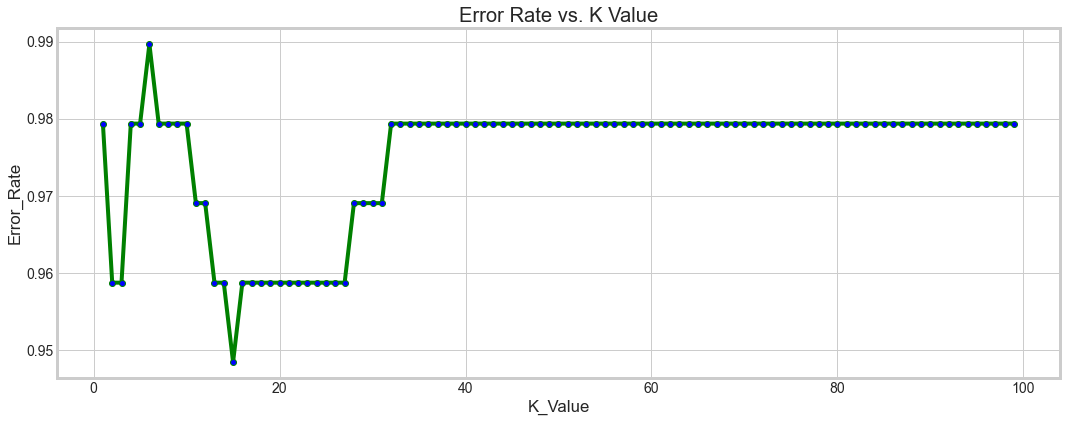

In [53]:
plt.figure(figsize=(16,6))
plt.plot(range(1,100),err_rate,color='green', 
         marker='o',markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

# Observation :
- According to the elbow method the best K is around 16

# PLOTTING ACTUAL VS PREDICTION

Text(0.5, 1.0, 'Actual vs Predicted Points')

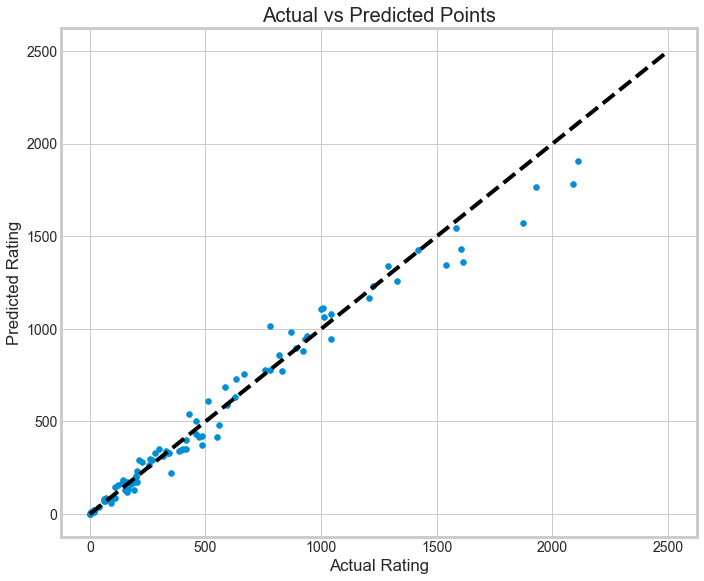

In [47]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test , Y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.title("Actual vs Predicted Points")

# Done